In [1]:
!pip install ace-tools
!pip install contextily
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.3 MB/s eta 0:00:00


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

In [4]:
file_path = '/content/Landslides.csv'
landslides_df = pd.read_csv(file_path)

In [ ]:
# Data Processing


filtered_df = landslides_df[landslides_df['country_name'] == "India"]


key_columns = ['event_date', 'latitude', 'longitude', 'event_description']
cleaned_df = filtered_df.dropna(subset=key_columns)


cleaned_df['event_date'] = pd.to_datetime(cleaned_df['event_date'], errors='coerce', format='mixed')


cleaned_df = cleaned_df.dropna(subset=['event_date'])


grouped_df = cleaned_df.groupby('admin_division_name').size().reset_index(name='landslide_count')

<ipython-input-5-32c7ab5b523f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['event_date'] = pd.to_datetime(cleaned_df['event_date'], errors='coerce', format='mixed')


In [6]:
print(grouped_df)

            admin_division_name  landslide_count
0   Andaman and Nicobar Islands                2
1                Andhra Pradesh               24
2             Arunachal Pradesh               74
3                         Assam               94
4                         Bihar                3
5                         Delhi                4
6                           Goa               25
7                       Gujarat                2
8                       Haryana                5
9              Himachal Pradesh              208
10            Jammu and Kashmir              296
11                    Jharkhand                2
12                    Karnataka               62
13                       Kerala              118
14               Madhya Pradesh                2
15                  Maharashtra               79
16                      Manipur              101
17                    Meghalaya               38
18                      Mizoram               39
19                  

In [10]:
grouped_df.head(15)

,admin_division_name,landslide_count
0,Andaman and Nicobar Islands,2
1,Andhra Pradesh,24
2,Arunachal Pradesh,74
3,Assam,94
4,Bihar,3
5,Delhi,4
6,Goa,25
7,Gujarat,2
8,Haryana,5
9,Himachal Pradesh,208


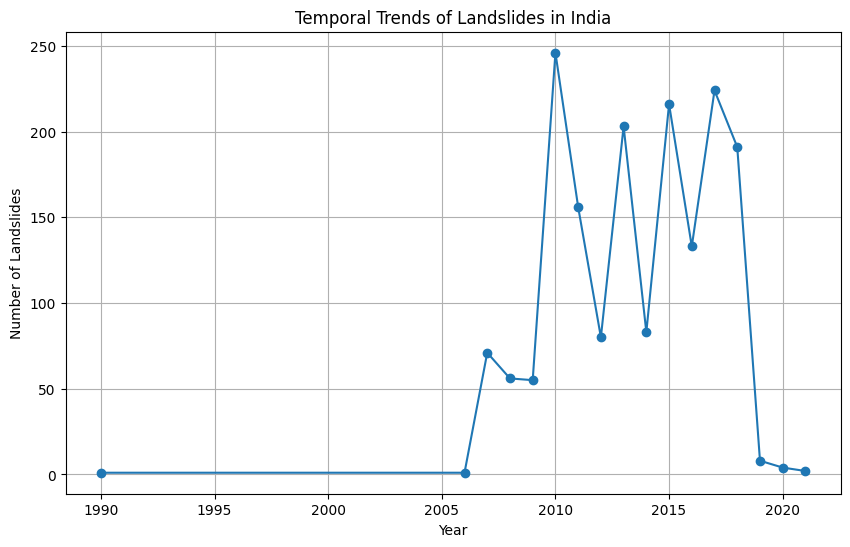

In [ ]:
# Temporal Analysis: Trends over time, identifying peak periods
cleaned_df['year'] = cleaned_df['event_date'].dt.year


temporal_trends = cleaned_df.groupby('year').size().reset_index(name='landslide_count')


plt.figure(figsize=(10, 6))
plt.plot(temporal_trends['year'], temporal_trends['landslide_count'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Landslides')
plt.title('Temporal Trends of Landslides in India')
plt.grid(True)
plt.show()


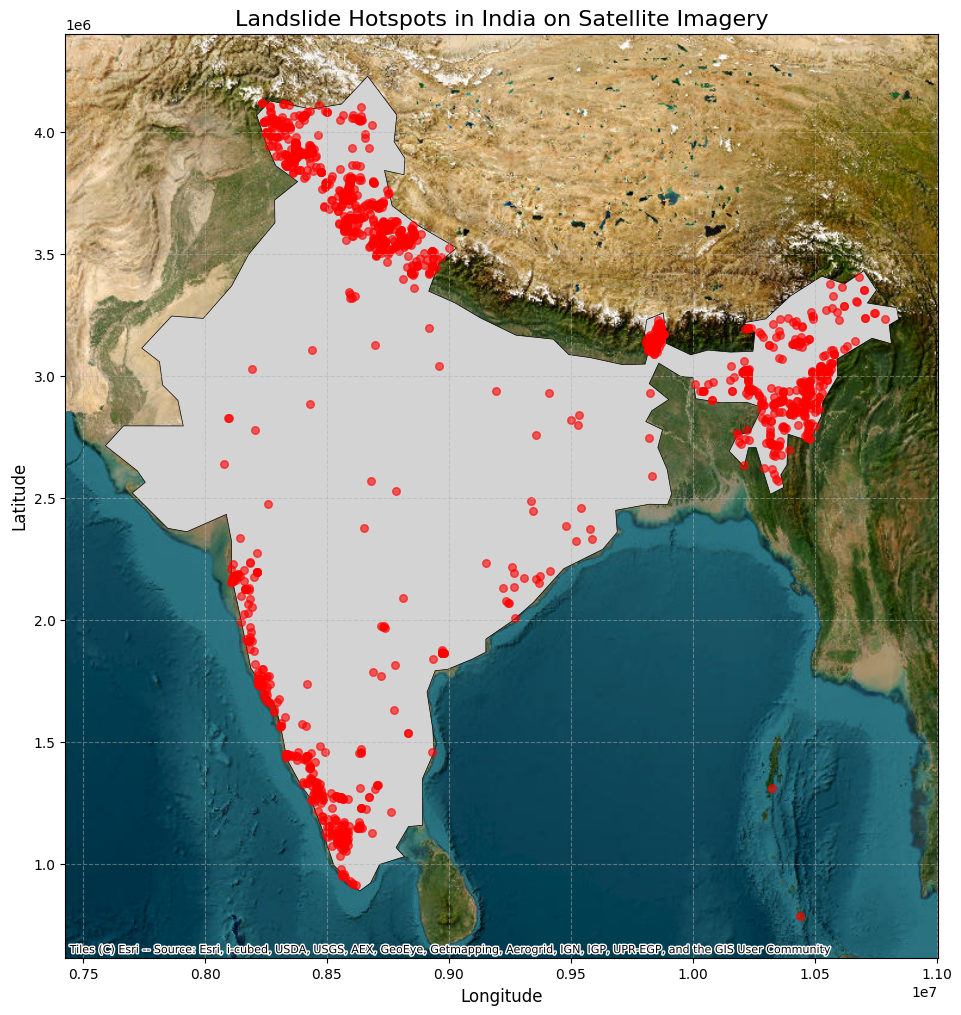

In [ ]:
# Geospatial Analysis: Mapping to locate hotspots


geometry = [Point(xy) for xy in zip(cleaned_df['longitude'].astype(float), cleaned_df['latitude'].astype(float))]
geodata = gpd.GeoDataFrame(cleaned_df, geometry=geometry, crs='EPSG:4326')


world = gpd.read_file('https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip')
india = world[world['NAME'] == "India"]


fig, ax = plt.subplots(figsize=(12, 12))
india.to_crs(epsg=3857).plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)
geodata.to_crs(epsg=3857).plot(ax=ax, markersize=30, color='red', alpha=0.6)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)
plt.title('Landslide Hotspots in India on Satellite Imagery', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

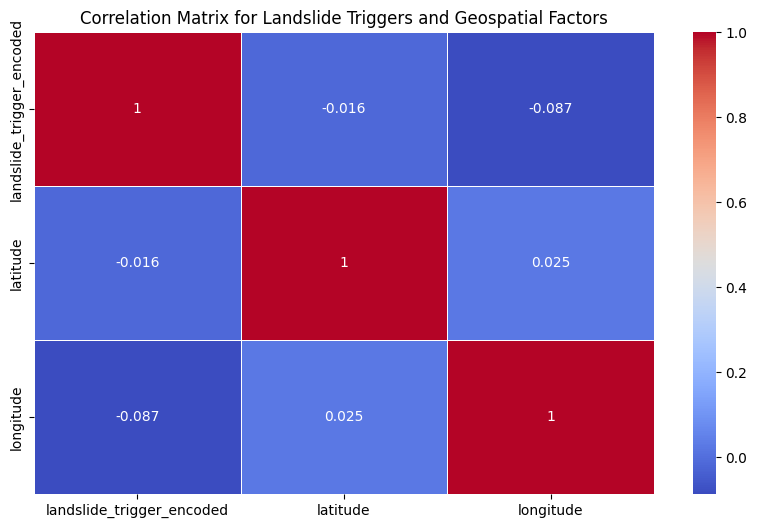

In [ ]:
# Impact and Cause Analysis: Correlation studies to identify severity factors


cleaned_df['landslide_trigger_encoded'] = cleaned_df['landslide_trigger'].astype('category').cat.codes


correlation_matrix = cleaned_df[['landslide_trigger_encoded', 'latitude', 'longitude']].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Landslide Triggers and Geospatial Factors')
plt.show()

<ipython-input-36-bf6dd6c0d2be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Landslide Trigger', y='Count', data=trigger_counts, palette='viridis')


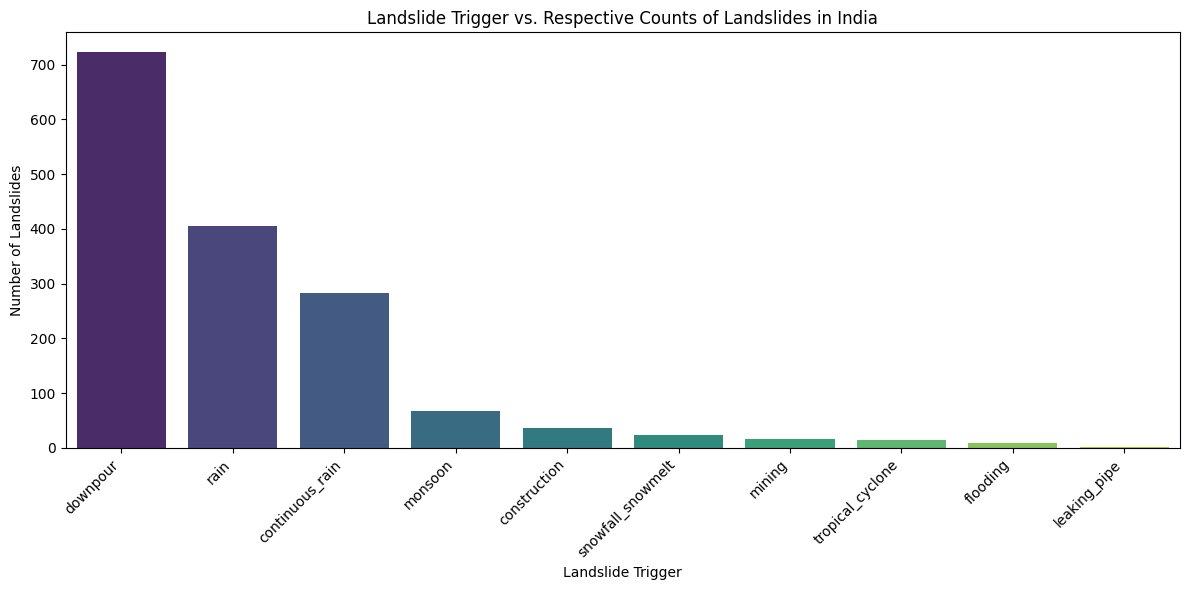

In [ ]:
# Plotting landslide trigger vs. respective counts

trigger_counts = cleaned_df[~cleaned_df['landslide_trigger'].isin(['unknown', 'other'])]['landslide_trigger'].value_counts().reset_index()
trigger_counts.columns = ['Landslide Trigger', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Landslide Trigger', y='Count', data=trigger_counts, palette='viridis')
plt.xlabel('Landslide Trigger')
plt.ylabel('Number of Landslides')
plt.title('Landslide Trigger vs. Respective Counts of Landslides in India')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-37-4ef242350b01>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='landslide_trigger', y='fatality_count', data=fatality_by_trigger, palette='magma')


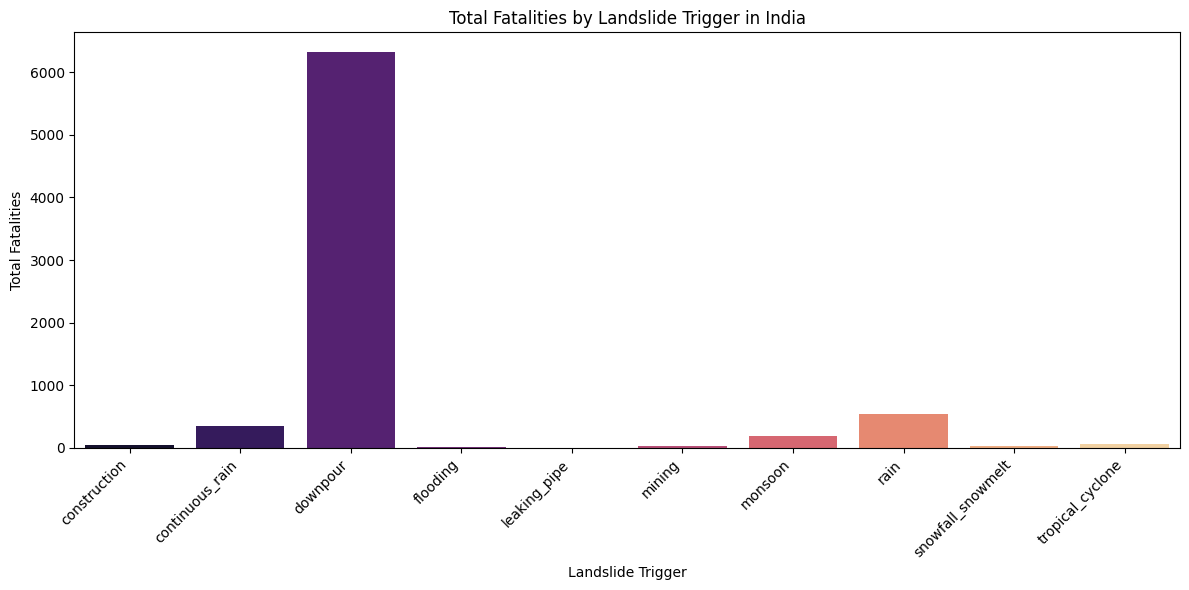

In [ ]:
# Analyzing fatality counts by landslide trigger

fatality_by_trigger = cleaned_df.groupby('landslide_trigger')['fatality_count'].sum().reset_index()
fatality_by_trigger = fatality_by_trigger[~fatality_by_trigger['landslide_trigger'].isin(['unknown', 'other'])]

plt.figure(figsize=(12, 6))
sns.barplot(x='landslide_trigger', y='fatality_count', data=fatality_by_trigger, palette='magma')
plt.xlabel('Landslide Trigger')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities by Landslide Trigger in India')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-38-7e10873a0589>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='landslide_trigger', y='injury_count', data=injury_by_trigger, palette='plasma')


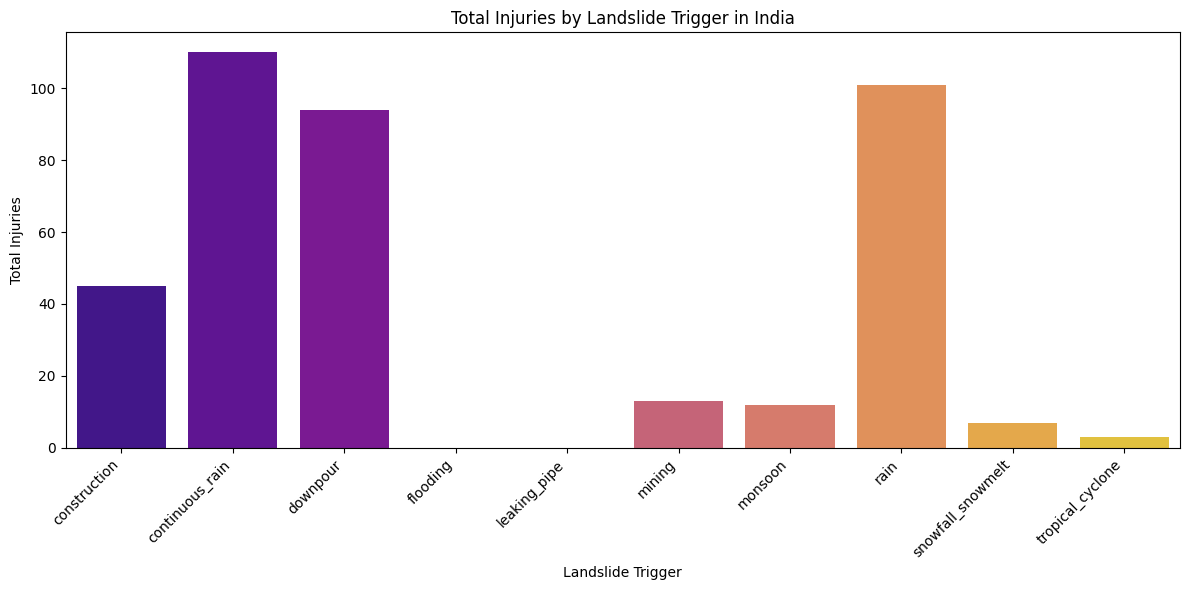

In [ ]:
# Comparing injury counts across different triggers

injury_by_trigger = cleaned_df.groupby('landslide_trigger')['injury_count'].sum().reset_index()
injury_by_trigger = injury_by_trigger[~injury_by_trigger['landslide_trigger'].isin(['unknown', 'other'])]

plt.figure(figsize=(12, 6))
sns.barplot(x='landslide_trigger', y='injury_count', data=injury_by_trigger, palette='plasma')
plt.xlabel('Landslide Trigger')
plt.ylabel('Total Injuries')
plt.title('Total Injuries by Landslide Trigger in India')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


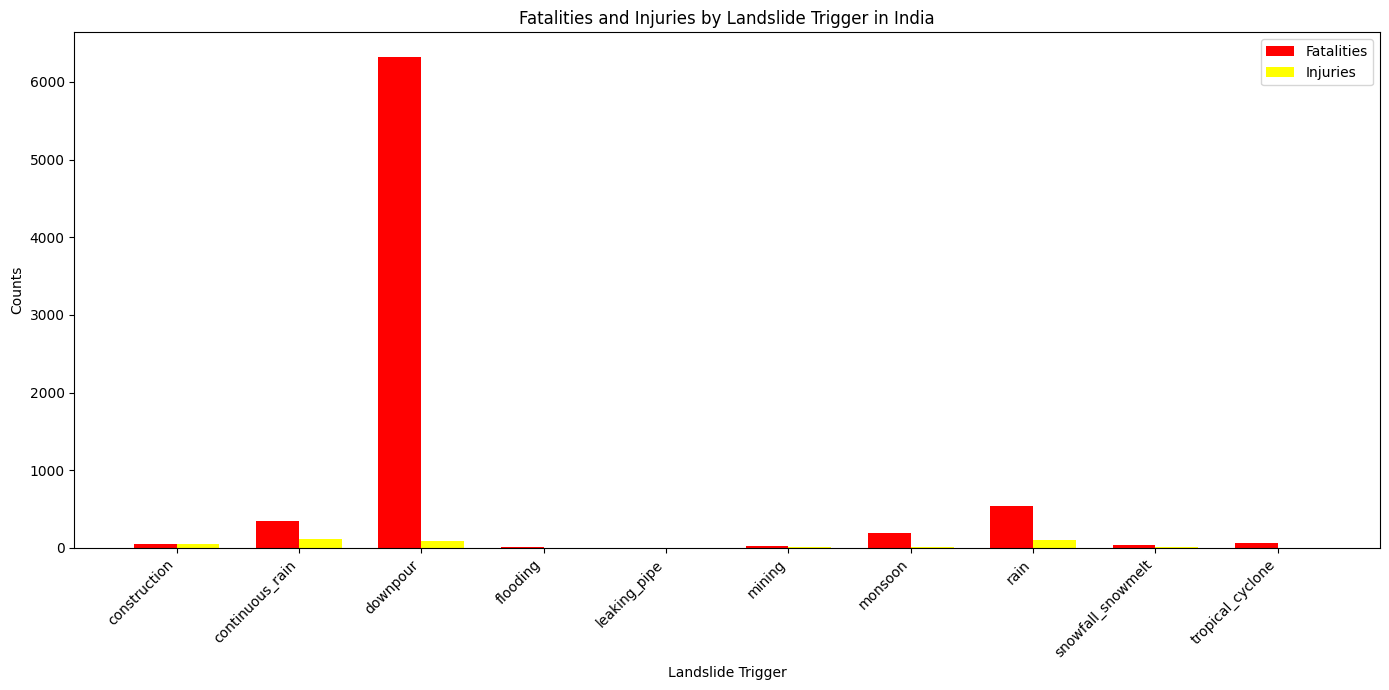

In [ ]:
# Analyzing fatality and injury counts by landslide trigger
fatality_by_trigger = cleaned_df.groupby('landslide_trigger')['fatality_count'].sum().reset_index()
injury_by_trigger = cleaned_df.groupby('landslide_trigger')['injury_count'].sum().reset_index()


combined_df = pd.merge(fatality_by_trigger, injury_by_trigger, on='landslide_trigger')
combined_df = combined_df[~combined_df['landslide_trigger'].isin(['unknown', 'other'])]


x = np.arange(len(combined_df))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(x - width/2, combined_df['fatality_count'], width, label='Fatalities', color='red')
ax.bar(x + width/2, combined_df['injury_count'], width, label='Injuries', color='yellow')

ax.set_xlabel('Landslide Trigger')
ax.set_ylabel('Counts')
ax.set_title('Fatalities and Injuries by Landslide Trigger in India')
ax.set_xticks(x)
ax.set_xticklabels(combined_df['landslide_trigger'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

<ipython-input-45-c9976a2dfea7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='admin_division_name', y='landslide_count', data=grouped_df, palette='cividis')


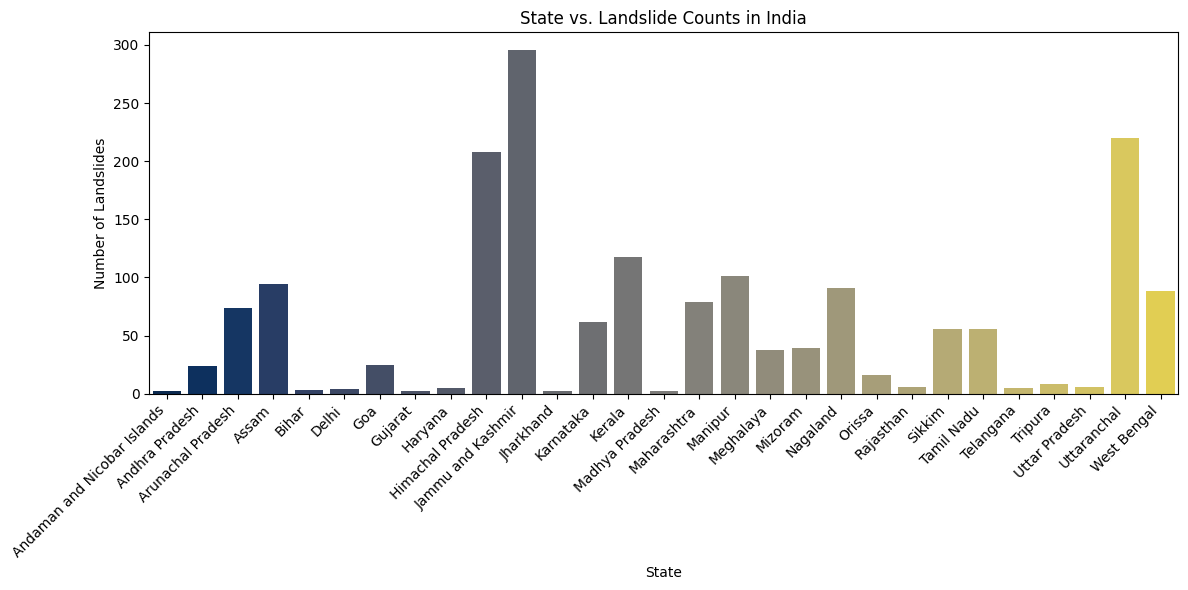

In [ ]:
# Plotting state vs. landslide counts
plt.figure(figsize=(12, 6))
sns.barplot(x='admin_division_name', y='landslide_count', data=grouped_df, palette='cividis')
plt.xlabel('State')
plt.ylabel('Number of Landslides')
plt.title('State vs. Landslide Counts in India')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Landslide Prone Areas in India:
   admin_division_name  landslide_count
2    Arunachal Pradesh               74
3                Assam               94
9     Himachal Pradesh              208
10   Jammu and Kashmir              296
12           Karnataka               62
13              Kerala              118
15         Maharashtra               79
16             Manipur              101
19            Nagaland               91
27         Uttaranchal              220
28         West Bengal               88


<ipython-input-47-60fd067675a6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='admin_division_name', y='landslide_count', data=prone_areas, palette='inferno')


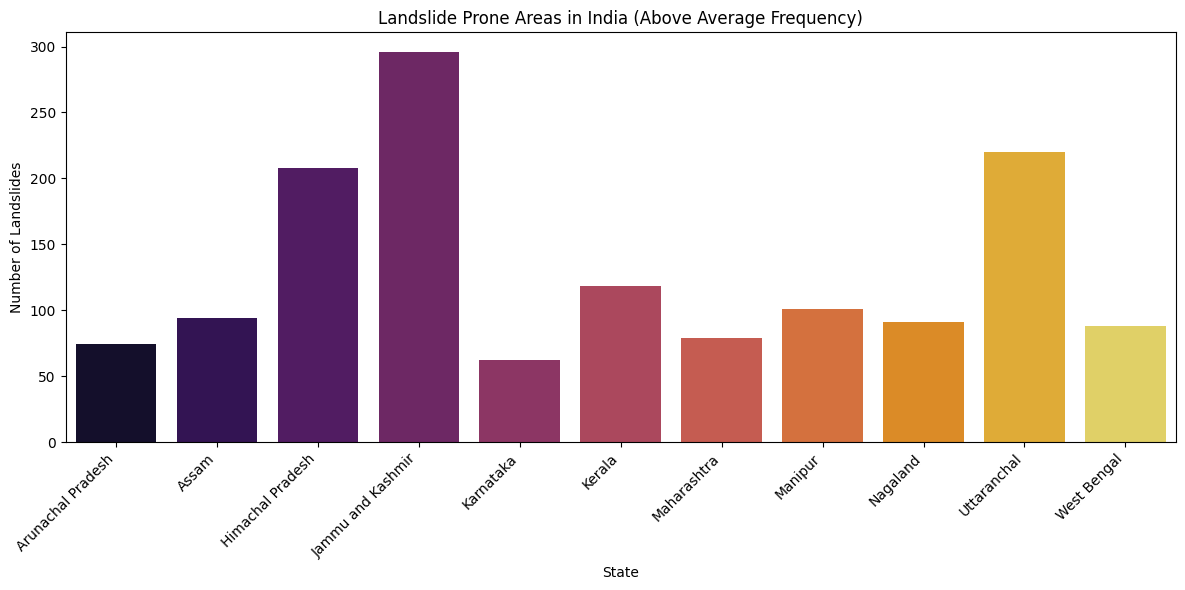

In [ ]:
# Highlighting landslide-prone areas based on frequency
prone_areas = grouped_df[grouped_df['landslide_count'] > grouped_df['landslide_count'].mean()]
print("Landslide Prone Areas in India:")
print(prone_areas)

plt.figure(figsize=(12, 6))
sns.barplot(x='admin_division_name', y='landslide_count', data=prone_areas, palette='inferno')
plt.xlabel('State')
plt.ylabel('Number of Landslides')
plt.title('Landslide Prone Areas in India (Above Average Frequency)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-49-ace5331b17c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='landslide_count', data=seasonal_trends, palette='coolwarm')


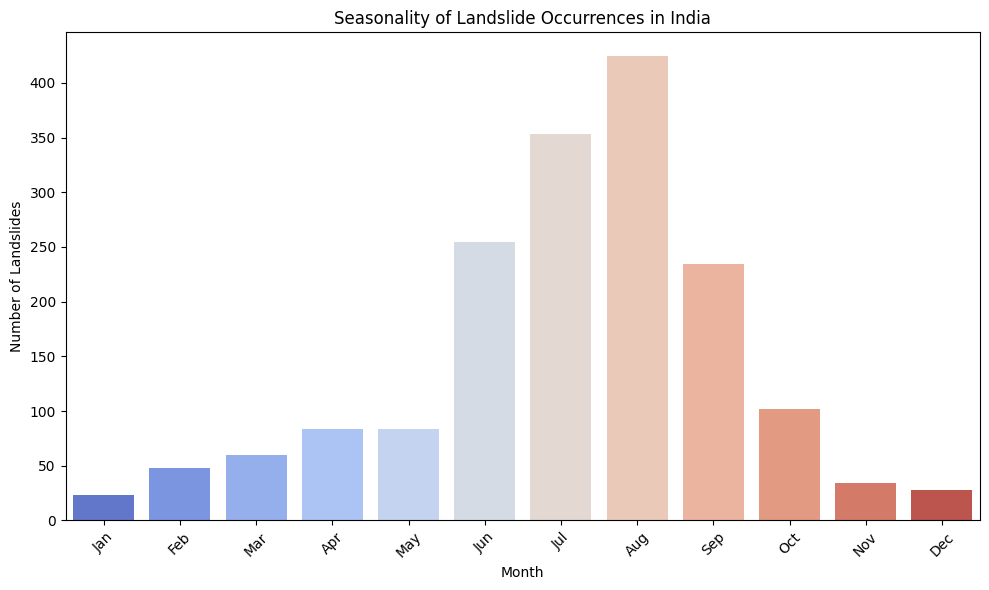

In [ ]:
# Seasonality Analysis: Analyzing landslide occurrences by month
cleaned_df['month'] = cleaned_df['event_date'].dt.month
seasonal_trends = cleaned_df.groupby('month').size().reset_index(name='landslide_count')


plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='landslide_count', data=seasonal_trends, palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Number of Landslides')
plt.title('Seasonality of Landslide Occurrences in India')
plt.xticks(ticks=np.arange(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

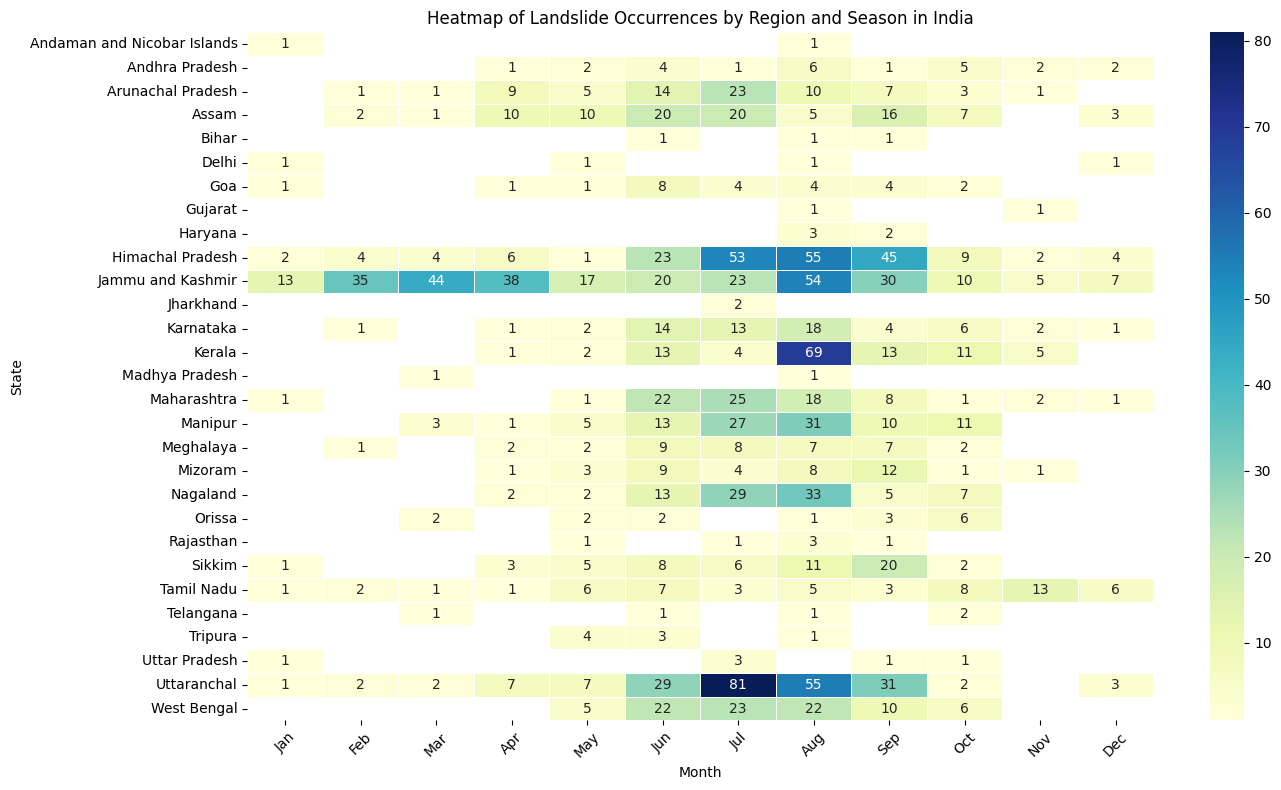

In [ ]:
# Visualize landslides by region and season
region_season_df = cleaned_df.groupby(['admin_division_name', 'month']).size().reset_index(name='landslide_count')
plt.figure(figsize=(14, 8))
sns.heatmap(region_season_df.pivot(index='admin_division_name', columns='month', values='landslide_count'), cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.xlabel('Month')
plt.ylabel('State')
plt.title('Heatmap of Landslide Occurrences by Region and Season in India')
plt.xticks(ticks=np.arange(0.5, 12.5), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

Top 5 Landslide Prone States in India:
   admin_division_name  landslide_count
10   Jammu and Kashmir              296
27         Uttaranchal              220
9     Himachal Pradesh              208
13              Kerala              118
16             Manipur              101


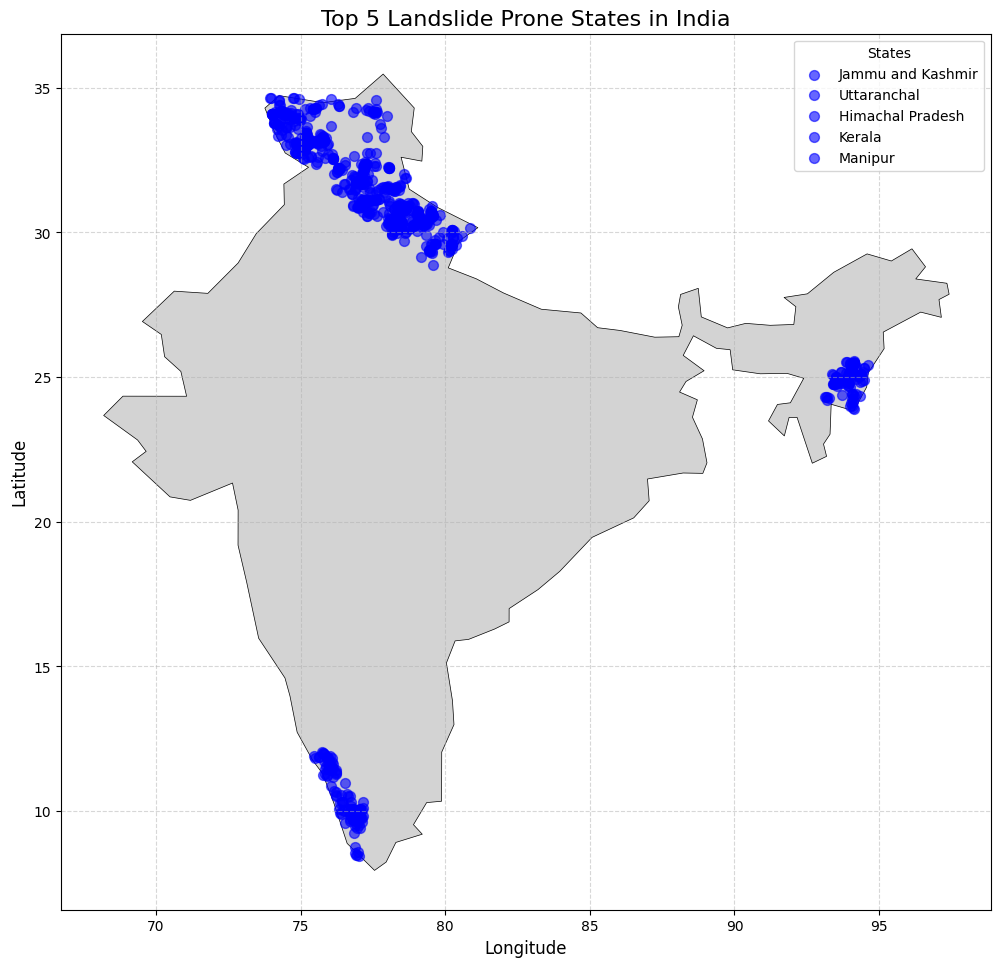

In [ ]:
# Highlighting top 5 landslide prone states on the map
top_5_prone_states = grouped_df.sort_values(by='landslide_count', ascending=False).head(5)
print("Top 5 Landslide Prone States in India:")
print(top_5_prone_states)

fig, ax = plt.subplots(figsize=(12, 12))
india.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)
for state in top_5_prone_states['admin_division_name']:
    state_data = cleaned_df[cleaned_df['admin_division_name'] == state]
    state_geometry = [Point(xy) for xy in zip(state_data['longitude'].astype(float), state_data['latitude'].astype(float))]
    state_geodata = gpd.GeoDataFrame(state_data, geometry=state_geometry)
    state_geodata.plot(ax=ax, markersize=50, color='blue', alpha=0.6, label=state)
plt.title('Top 5 Landslide Prone States in India', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='States')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Highlighting top 5 landslide prone states on the map
top_5_prone_states = grouped_df.sort_values(by='landslide_count', ascending=False).head(5)
print("Top 5 Landslide Prone States in India:")
print(top_5_prone_states)

Top 5 Landslide Prone States in India:
   admin_division_name  landslide_count
10   Jammu and Kashmir              296
27         Uttaranchal              220
9     Himachal Pradesh              208
13              Kerala              118
16             Manipur              101


In [ ]:
# Interactive Maps with Folium
import folium
from folium.plugins import MarkerCluster

# Creating a base map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5, tiles='OpenStreetMap')

# Adding marker clusters to represent landslides
marker_cluster = MarkerCluster().add_to(m)

# Adding points to the map for each landslide
for idx, row in cleaned_df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=(f"Date: {row['event_date']}<br>Trigger: {row['landslide_trigger']}<br>Fatalities: {row['fatality_count']}<br>Injuries: {row['injury_count']}"),
                  icon=folium.Icon(color='red', icon='info-sign')).add_to(marker_cluster)

# Save the map to an HTML file
m.save('interactive_landslide_map.html')
print("Interactive map saved as 'interactive_landslide_map.html'")


Interactive map saved as 'interactive_landslide_map.html'


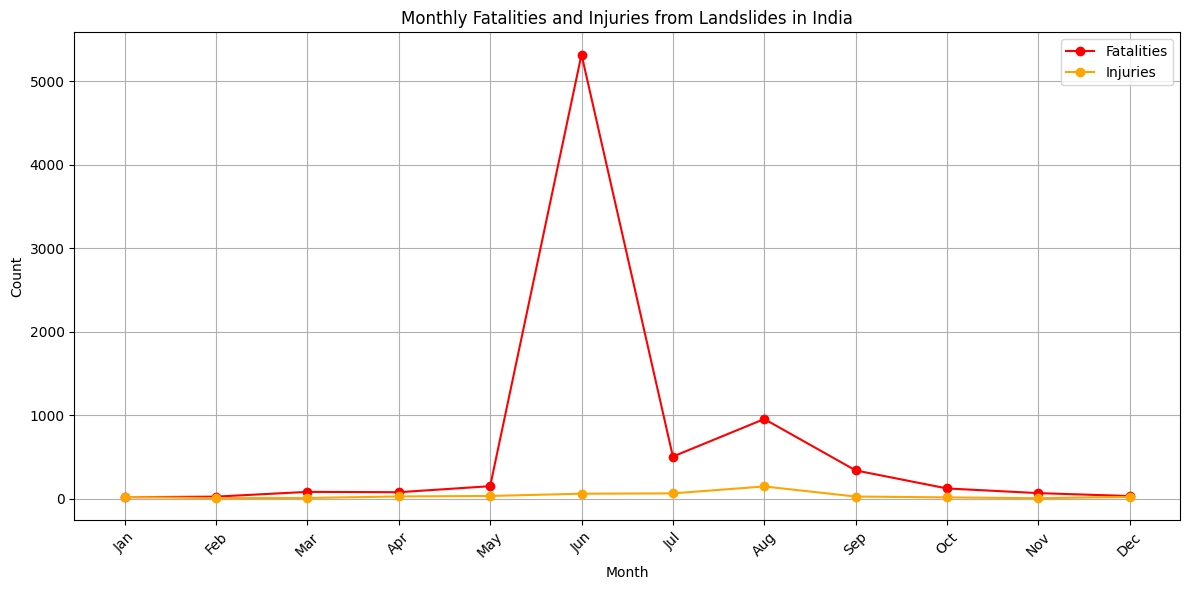

In [ ]:
# Monthly Fatality and Injury Patterns Analysis


cleaned_df['month'] = cleaned_df['event_date'].dt.month


monthly_fatalities = cleaned_df.groupby('month')['fatality_count'].sum().reset_index()
monthly_injuries = cleaned_df.groupby('month')['injury_count'].sum().reset_index()


monthly_severity = pd.merge(monthly_fatalities, monthly_injuries, on='month')


plt.figure(figsize=(12, 6))
plt.plot(monthly_severity['month'], monthly_severity['fatality_count'], marker='o', color='red', label='Fatalities')
plt.plot(monthly_severity['month'], monthly_severity['injury_count'], marker='o', color='orange', label='Injuries')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Fatalities and Injuries from Landslides in India')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Creating a "severity index" that combines fatalities and injuries to rank landslide events




cleaned_df['severity_index'] = cleaned_df['fatality_count'] + cleaned_df['injury_count']


severity_by_state = cleaned_df.groupby('admin_division_name')['severity_index'].sum().reset_index().sort_values(by='severity_index', ascending=False)
severity_by_trigger = cleaned_df.groupby('landslide_trigger')['severity_index'].sum().reset_index().sort_values(by='severity_index', ascending=False)

<ipython-input-16-0eb440650ff7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='admin_division_name', y='severity_index', data=severity_by_state, palette='Reds')


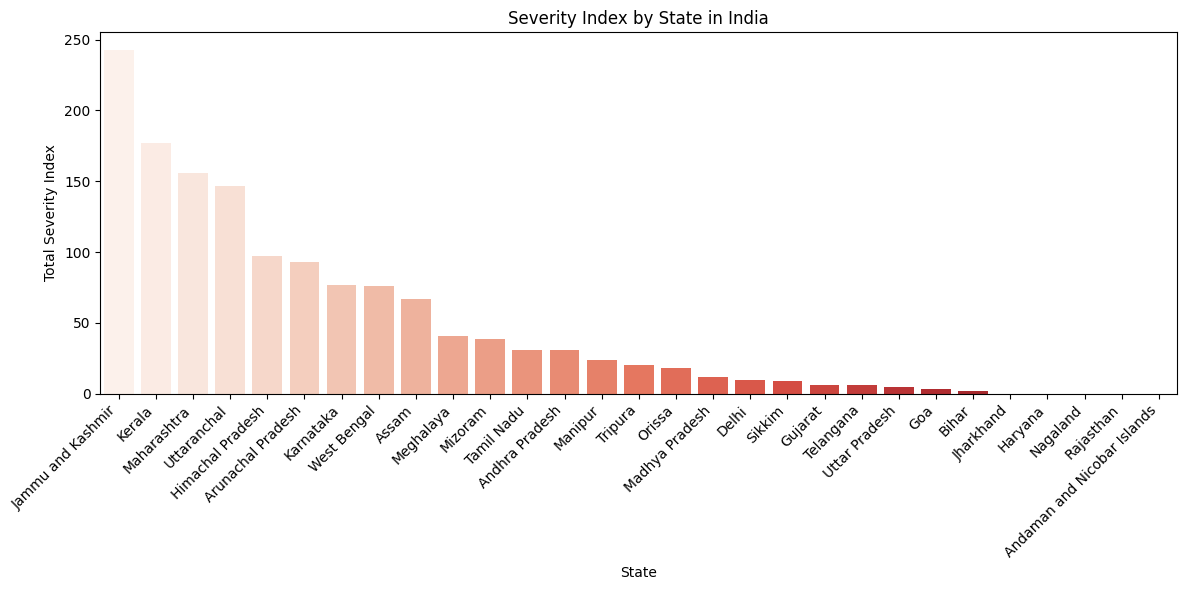

<ipython-input-16-0eb440650ff7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='landslide_trigger', y='severity_index', data=severity_by_trigger, palette='Blues')


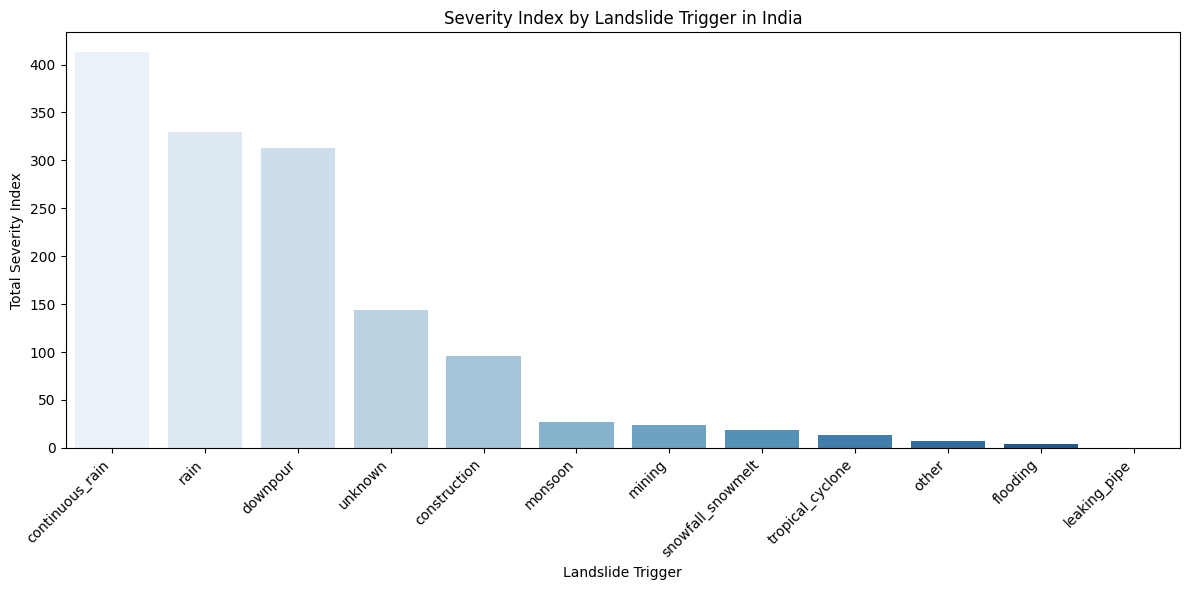

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x='admin_division_name', y='severity_index', data=severity_by_state, palette='Reds')
plt.xlabel('State')
plt.ylabel('Total Severity Index')
plt.title('Severity Index by State in India')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='landslide_trigger', y='severity_index', data=severity_by_trigger, palette='Blues')
plt.xlabel('Landslide Trigger')
plt.ylabel('Total Severity Index')
plt.title('Severity Index by Landslide Trigger in India')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


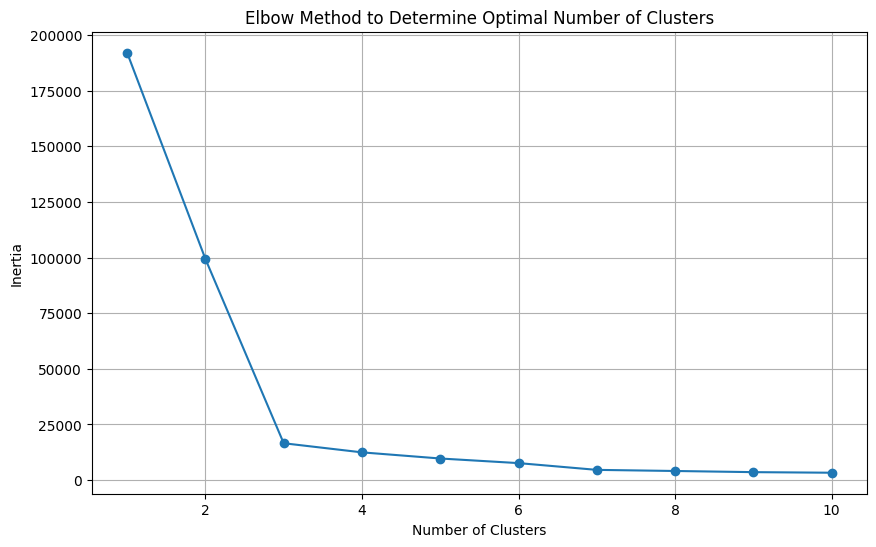

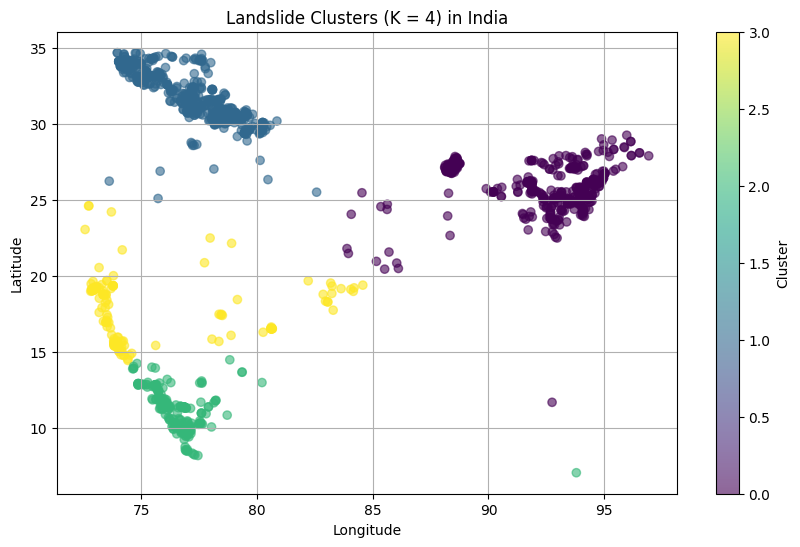

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


location_data = cleaned_df[['latitude', 'longitude']].dropna()


inertia = []
k_values = range(1, 11)  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(location_data)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.grid(True)
plt.show()


optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
location_data['cluster'] = kmeans.fit_predict(location_data)


plt.figure(figsize=(10, 6))
plt.scatter(location_data['longitude'], location_data['latitude'], c=location_data['cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Landslide Clusters (K = {optimal_k}) in India')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


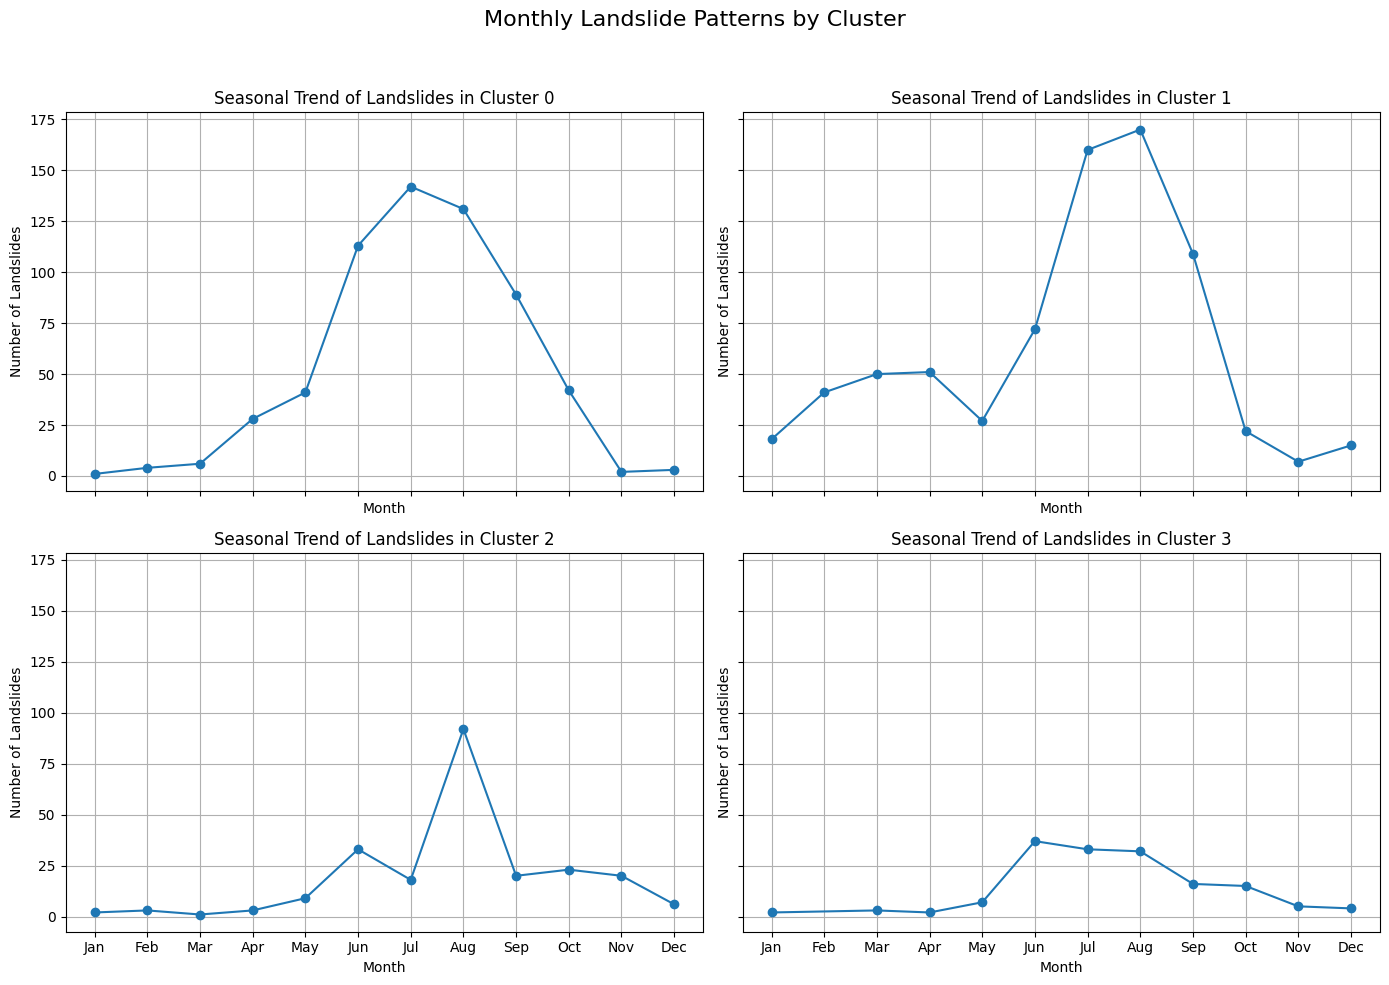

In [ ]:

location_data['year'] = cleaned_df['event_date'].dt.year
location_data['month'] = cleaned_df['event_date'].dt.month


monthly_trends = location_data.groupby(['cluster', 'month']).size().reset_index(name='landslide_count')


fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, cluster_id in enumerate(location_data['cluster'].unique()):
    cluster_data = monthly_trends[monthly_trends['cluster'] == cluster_id]
    axes[i].plot(cluster_data['month'], cluster_data['landslide_count'], marker='o')
    axes[i].set_title(f'Seasonal Trend of Landslides in Cluster {cluster_id}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Landslides')
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.suptitle('Monthly Landslide Patterns by Cluster', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


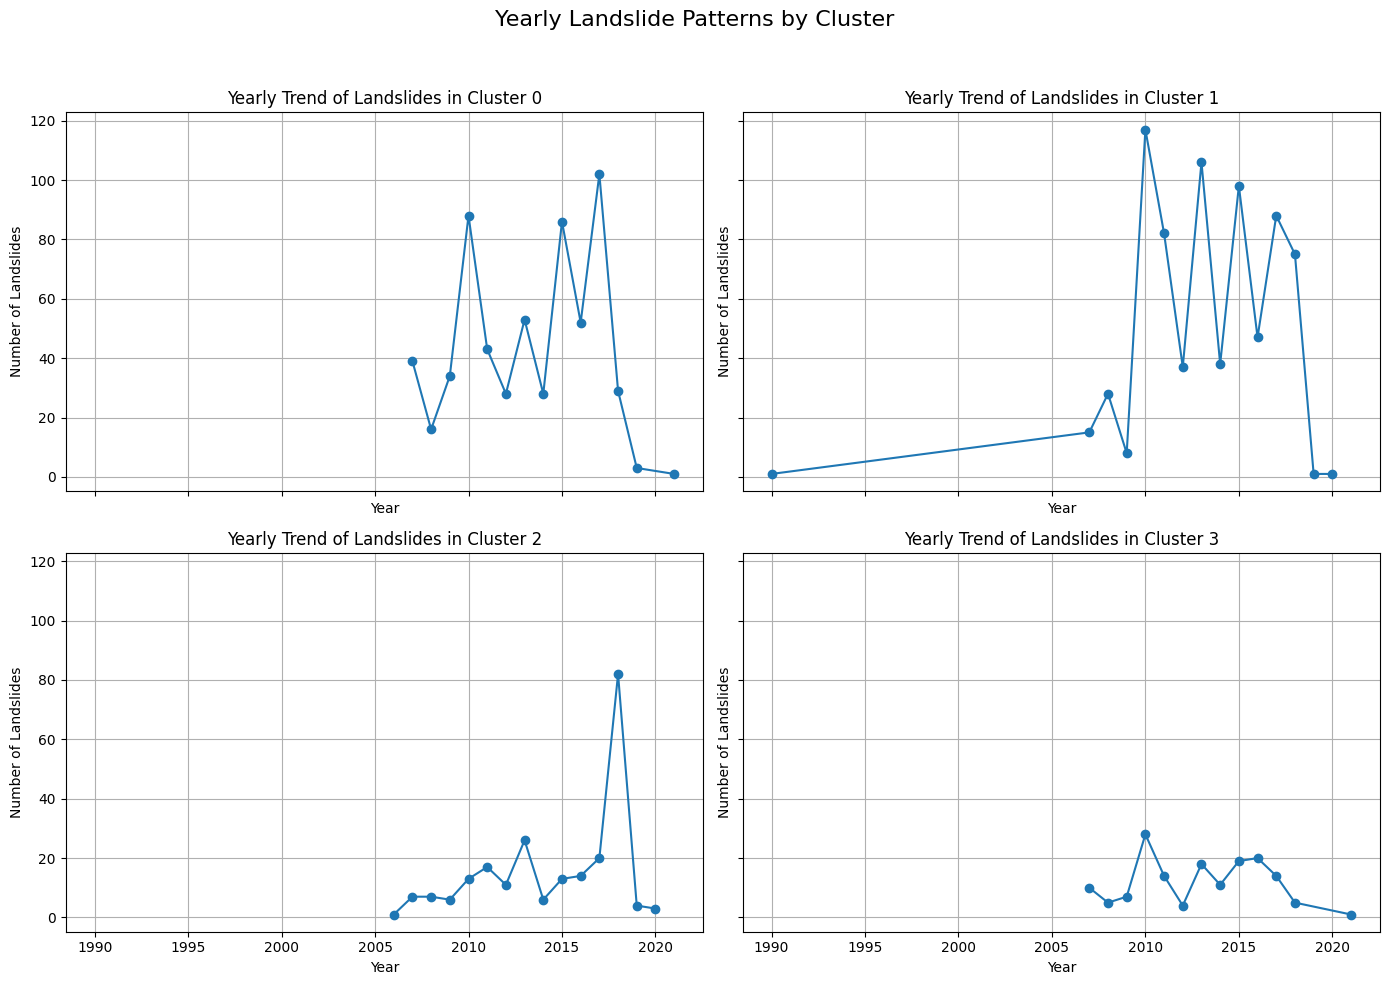

In [ ]:

yearly_trends = location_data.groupby(['cluster', 'year']).size().reset_index(name='landslide_count')


fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, cluster_id in enumerate(location_data['cluster'].unique()):
    cluster_data = yearly_trends[yearly_trends['cluster'] == cluster_id]
    axes[i].plot(cluster_data['year'], cluster_data['landslide_count'], marker='o')
    axes[i].set_title(f'Yearly Trend of Landslides in Cluster {cluster_id}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Landslides')
    axes[i].grid(True)

plt.suptitle('Yearly Landslide Patterns by Cluster', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Geographic Regions of Interest:

- Cluster 3 (Green): This cluster seems to cover the southern region of India, potentially encompassing the Western Ghats, which is known for its steep terrain and heavy monsoon rains that contribute to landslides.

- Cluster 2 (Yellow): This cluster appears to follow a southwestern path, potentially covering areas in central or western parts of the country that experience seasonal rainfall.

- Cluster 1 (Purple): This cluster is prominent in northeastern India, an area known for high rainfall and hilly terrain, particularly in states like Assam and Meghalaya.

- Cluster 0 (Blue): This cluster covers the northern region, likely including the Himalayan range, where landslides are common due to mountainous topography and snowmelt.